# Import Libraries

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import numpy as np

import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import pdb
sns.set_style(style="whitegrid")
from matplotlib import rcParams

%matplotlib inline
plt.style.use('fivethirtyeight')
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
#rcParams['text.color'] = 'K'
rcParams['figure.figsize'] = 16,8

# Import Dataset untuk Modelling

In [136]:
data_train = pd.read_csv('20210731_Data Pajak Per NPWP ready.csv')

In [137]:
data_train.shape

(26390, 36)

In [5]:
data_train = data_train.drop(columns=['Unnamed: 0'])
data_train.head()

,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,FP_9,...,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,score_11,score_12
0,562197926987555,6.467929e+11,1.360289e+12,2.495005e+11,1.485149e+11,2.977032e+11,1.301476e+11,1.521944e+11,1.604439e+11,1.329168e+11,...,0.490598,0.446950,0.425040,0.466808,0.453214,0.449855,0.464601,0.470105,0.456958,0.493852
1,560540673980555,1.921724e+12,6.836181e+11,3.637846e+12,1.861282e+11,9.103713e+11,2.880675e+12,1.614540e+12,1.087428e+12,1.563684e+12,...,0.516716,0.519049,0.501951,0.488183,0.497002,0.502556,0.517378,0.494605,0.481987,0.505271
2,568127133583555,-6.167469e+10,-3.460207e+10,-3.711834e+10,-3.696261e+10,-2.112113e+10,-5.360252e+10,-4.970846e+10,-5.230391e+10,-3.138140e+10,...,0.443699,0.447433,0.484527,0.484561,0.507025,0.496808,0.452307,0.465099,0.465426,0.443524
3,561725390986555,-3.811280e+11,-2.634144e+11,-8.451206e+11,-8.405869e+11,-5.934585e+11,-2.220851e+11,-9.559368e+12,-1.594444e+12,-1.560891e+12,...,0.458823,0.433747,0.413993,0.493132,0.456861,0.432488,0.413526,0.492078,0.441298,0.519123
4,575401131957555,9.366596e+12,2.939077e+12,6.061455e+12,2.116758e+13,7.450490e+12,5.746475e+12,3.431415e+12,4.151862e+12,4.373211e+12,...,0.545899,0.541998,0.555817,0.509735,0.553797,0.536210,0.560412,0.512759,0.525773,0.510946


In [7]:
data_train.columns

Index(['NPWP', 'FP_1', 'FP_2', 'FP_3', 'FP_4', 'FP_5', 'FP_6', 'FP_7', 'FP_8',
       'FP_9', 'FP_10', 'FP_11', 'FP_12', 'is_importir', 'is_eksportir',
       'is_wajib_pajak', 'is_NPWP_pembeli_same_NPWP_penjual',
       'Nunique_NPWP_Pembeli', 'Nunique_NPWP_Penjual',
       'max_jmlh_barang_diekspor_dlm_sehari',
       'max_jmlh_barang_diimpor_dlm_sehari', 'max_jumlah_faktur_ke_1_buyer',
       'max_jumlah_faktur_ke_1_seller', 'score_1', 'score_2', 'score_3',
       'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9',
       'score_10', 'score_11', 'score_12'],
      dtype='object')

In [8]:
#NPWP_eks_imp = data_train.loc[(data_train['is_importir'] == 1 ) & (data_train['is_eksportir'] == 1)]
#NPWP_eks = data_train.loc[(data_train['is_importir'] == 0 ) & (data_train['is_eksportir'] == 1)]
#NPWP_imp = data_train.loc[(data_train['is_importir'] == 1 ) & (data_train['is_eksportir'] == 0)]

In [14]:
#NPWP_eks_imp

,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,FP_9,...,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,score_11,score_12
7,564796489986555,4.253643e+13,4.143430e+13,3.541632e+13,8.244587e+13,6.583131e+13,6.158352e+13,3.833565e+13,2.279750e+13,3.305579e+13,...,0.469977,0.475448,0.477734,0.474795,0.482928,0.480164,0.497055,0.479099,0.487342,0.489155
9,568881293583555,-1.581072e+13,-3.906259e+12,-7.329738e+12,-5.305660e+12,-6.191447e+12,-8.963469e+12,-6.572394e+12,-9.266714e+12,-3.286053e+12,...,0.608358,0.594372,0.588203,0.595316,0.627950,0.585405,0.626385,0.579945,0.565216,0.613137
11,565146136502555,2.020143e+12,1.740349e+12,2.382708e+12,1.913755e+12,1.859917e+12,1.721542e+12,1.886457e+12,2.690977e+12,1.364302e+12,...,0.327996,0.390323,0.278889,0.387887,0.380992,0.405238,0.464059,0.325389,0.404468,0.402749
13,569327197678555,-1.922682e+11,7.286620e+10,2.599014e+11,-3.463811e+11,-4.291049e+11,-4.316729e+11,-3.408333e+11,-2.761273e+11,-3.220942e+11,...,0.829371,0.836183,0.863290,0.605181,0.811172,0.859338,0.882708,0.877681,0.829207,0.877139
14,560977158960555,1.678508e+13,1.626214e+13,2.289782e+13,2.047961e+13,2.680781e+13,1.365958e+13,1.099596e+13,1.737603e+13,1.273493e+13,...,0.691370,0.668915,0.670951,0.701465,0.700855,0.695970,0.711489,0.691319,0.676721,0.665665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,276250837170555,0.000000e+00,0.000000e+00,0.000000e+00,1.314655e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.599297,0.000000,0.000000,0.000000,0.000000,0.000000,0.728420,0.000000,0.599297
8604,470741874356555,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
8617,867975988568555,6.272836e+08,0.000000e+00,0.000000e+00,6.117122e+08,0.000000e+00,6.422723e+08,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.885585,0.000000,0.799770,0.000000,0.000000,0.000000,0.542779,0.000000,0.000000
10183,303950252060555,0.000000e+00,0.000000e+00,1.892220e+05,1.111100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.733331,0.733312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
#df_data = NPWP_eks_imp.drop(columns=['NPWP'])

In [17]:
#df_data.sample(10000)

# Isolation Forest Algorithm
# Menentukan parameter untuk IForest

In [18]:
from tqdm import tqdm
def train(X,clf,ensembleSize=10,sampleSize=100):
    mdlLst=[]
    for n in range(ensembleSize):
        X=df_data.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    return mdlLst

## Not valif for LOF
def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in tqdm(mdlLst):
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

# Training the Model

In [19]:
alg=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)

In [20]:
if_mdlLst=train(data_train,alg)
if_mdlLst

[IsolationForest(contamination=0.05, n_jobs=-1, random_state=42),
 IsolationForest(contamination=0.05, n_jobs=-1, random_state=42),
 IsolationForest(contamination=0.05, n_jobs=-1, random_state=42),
 IsolationForest(contamination=0.05, n_jobs=-1, random_state=42),
 IsolationForest(contamination=0.05, n_jobs=-1, random_state=42),
 IsolationForest(contamination=0.05, n_jobs=-1, random_state=42),
 IsolationForest(contamination=0.05, n_jobs=-1, random_state=42),
 IsolationForest(contamination=0.05, n_jobs=-1, random_state=42),
 IsolationForest(contamination=0.05, n_jobs=-1, random_state=42),
 IsolationForest(contamination=0.05, n_jobs=-1, random_state=42)]

In [21]:
if_y_pred=predict(df_data,if_mdlLst)
if_y_pred

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.69it/s]


array([-3.22187773e-02,  3.37039126e-02,  9.95483060e-02, -1.49425019e-02,
       -1.51815123e-01, -2.85421071e-01,  7.39274068e-02,  6.15830521e-02,
       -1.56482219e-02, -1.34507380e-01,  1.63146731e-02, -3.35645149e-03,
        7.36857885e-02,  9.87282427e-02, -2.77871876e-02,  2.44132016e-02,
        2.58753494e-02, -1.31049866e-01,  6.25285951e-02,  5.41866754e-02,
        1.22110924e-01,  1.27101716e-01,  1.06928464e-01,  9.68520268e-02,
       -2.69272811e-01, -1.27489708e-01,  5.09144316e-02, -2.45661525e-01,
        2.08440231e-02,  2.37552869e-02, -2.34647157e-01,  1.47758833e-02,
        2.99076255e-02,  1.04353265e-01,  1.21550092e-01,  7.65719399e-02,
        1.10803441e-01,  3.15284400e-02,  1.49410221e-02,  2.59891430e-02,
        5.26313510e-02,  1.24962254e-01, -1.72619647e-01,  1.26106801e-01,
       -2.12738149e-01,  9.11690334e-02,  1.23706498e-01,  1.15077310e-01,
        1.74153475e-02, -7.58302709e-03, -3.14537426e-02, -9.73414537e-02,
        1.15211924e-01,  

# TEST

In [22]:
x=np.percentile(if_y_pred[0],95)
x

-0.03221877733835843

In [24]:
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

# Test

## 1.Tambah Fitur Nilai Score Seberapa Anomali suatu Data Point
## 2.Tambah Fitur kategorikal -1:Anomali, 1:Normal

In [26]:
NPWP_eks_imp['scores']=alg.decision_function(df_data)
NPWP_eks_imp['anomaly']=alg.predict(df_data)

In [27]:
NPWP_eks_imp

,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,FP_9,...,score_5,score_6,score_7,score_8,score_9,score_10,score_11,score_12,scores,anomaly
7,564796489986555,4.253643e+13,4.143430e+13,3.541632e+13,8.244587e+13,6.583131e+13,6.158352e+13,3.833565e+13,2.279750e+13,3.305579e+13,...,0.477734,0.474795,0.482928,0.480164,0.497055,0.479099,0.487342,0.489155,-0.032219,-1
9,568881293583555,-1.581072e+13,-3.906259e+12,-7.329738e+12,-5.305660e+12,-6.191447e+12,-8.963469e+12,-6.572394e+12,-9.266714e+12,-3.286053e+12,...,0.588203,0.595316,0.627950,0.585405,0.626385,0.579945,0.565216,0.613137,0.033704,1
11,565146136502555,2.020143e+12,1.740349e+12,2.382708e+12,1.913755e+12,1.859917e+12,1.721542e+12,1.886457e+12,2.690977e+12,1.364302e+12,...,0.278889,0.387887,0.380992,0.405238,0.464059,0.325389,0.404468,0.402749,0.099548,1
13,569327197678555,-1.922682e+11,7.286620e+10,2.599014e+11,-3.463811e+11,-4.291049e+11,-4.316729e+11,-3.408333e+11,-2.761273e+11,-3.220942e+11,...,0.863290,0.605181,0.811172,0.859338,0.882708,0.877681,0.829207,0.877139,-0.014943,-1
14,560977158960555,1.678508e+13,1.626214e+13,2.289782e+13,2.047961e+13,2.680781e+13,1.365958e+13,1.099596e+13,1.737603e+13,1.273493e+13,...,0.670951,0.701465,0.700855,0.695970,0.711489,0.691319,0.676721,0.665665,-0.151815,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,276250837170555,0.000000e+00,0.000000e+00,0.000000e+00,1.314655e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.728420,0.000000,0.599297,-0.019802,-1
8604,470741874356555,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,-0.029618,-1
8617,867975988568555,6.272836e+08,0.000000e+00,0.000000e+00,6.117122e+08,0.000000e+00,6.422723e+08,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.799770,0.000000,0.000000,0.000000,0.542779,0.000000,0.000000,-0.037476,-1
10183,303950252060555,0.000000e+00,0.000000e+00,1.892220e+05,1.111100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.034157,-1


# Proporsi Data Point yang Dianggap Anomali oleh IForest sebesar ~5%

In [28]:
NPWP_eks_imp.anomaly.value_counts(True)

 1    0.904372
-1    0.095628
Name: anomaly, dtype: float64

# Save data hasil scoring dengan IForest

In [30]:
NPWP_eks_imp.to_csv('20210801_Hasil Anomali Detection IForest Contamination 5%_export_import.csv')

# Alternatives

In [146]:
'''
df_data=df_data.drop(columns='scores')

random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.05),random_state=random_state)

model.fit(df_data)

print(model.get_params())

df_data['scores'] = model.decision_function(df_data)

df_data['anomaly_score'] = model.predict(df_data.iloc[:,:-1])

df_data[df_data['anomaly_score']==-1].head()

df_data.anomaly_score.value_counts(True)
'''

"\ndf_data=df_data.drop(columns='scores')\n\nrandom_state = np.random.RandomState(42)\nmodel=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.05),random_state=random_state)\n\nmodel.fit(df_data)\n\nprint(model.get_params())\n\ndf_data['scores'] = model.decision_function(df_data)\n\ndf_data['anomaly_score'] = model.predict(df_data.iloc[:,:-1])\n\ndf_data[df_data['anomaly_score']==-1].head()\n\ndf_data.anomaly_score.value_counts(True)\n"

# Bisakah cek feature importance iForest?

## Label Hasil iForest digunakan sebagai label untuk training Random Forest

## Memanfaatkan RandomForest untuk mendapatkan Feature Importance

In [3]:
df = pd.read_csv('20210801_Hasil Anomali Detection IForest Contamination 5%.csv')
df

,Unnamed: 0,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,score_5,score_6,score_7,score_8,score_9,score_10,score_11,score_12,scores,anomaly
0,0,562197926987555,6.467929e+11,1.360289e+12,2.495005e+11,1.485149e+11,2.977032e+11,1.301476e+11,1.521944e+11,1.604439e+11,...,0.425040,0.466808,0.453214,0.449855,0.464601,0.470105,0.456958,0.493852,-0.099338,-1
1,1,560540673980555,1.921724e+12,6.836181e+11,3.637846e+12,1.861282e+11,9.103713e+11,2.880675e+12,1.614540e+12,1.087428e+12,...,0.501951,0.488183,0.497002,0.502556,0.517378,0.494605,0.481987,0.505271,-0.150084,-1
2,2,568127133583555,-6.167469e+10,-3.460207e+10,-3.711834e+10,-3.696261e+10,-2.112113e+10,-5.360252e+10,-4.970846e+10,-5.230391e+10,...,0.484527,0.484561,0.507025,0.496808,0.452307,0.465099,0.465426,0.443524,0.009830,1
3,3,561725390986555,-3.811280e+11,-2.634144e+11,-8.451206e+11,-8.405869e+11,-5.934585e+11,-2.220851e+11,-9.559368e+12,-1.594444e+12,...,0.413993,0.493132,0.456861,0.432488,0.413526,0.492078,0.441298,0.519123,-0.020365,-1
4,4,575401131957555,9.366596e+12,2.939077e+12,6.061455e+12,2.116758e+13,7.450490e+12,5.746475e+12,3.431415e+12,4.151862e+12,...,0.555817,0.509735,0.553797,0.536210,0.560412,0.512759,0.525773,0.510946,-0.254895,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26385,26385,253148808580555,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.437306,0.000000,0.000000,0.162435,1
26386,26386,265046529568555,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.555500e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166349,1
26387,26387,574405549558555,0.000000e+00,0.000000e+00,3.111110e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155865,1
26388,26388,574485675563555,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.045454e+05,0.000000e+00,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165914,1


# Change Label

In [4]:
df.loc[(df.anomaly == 1),'anomaly'] = 0 #data normal diubah labelnya ke 0

In [5]:
df.loc[(df.anomaly == -1),'anomaly'] = 1 #data anomali diubah labelnya ke 1

# Random Forest

In [6]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# %%
## SPLIT DATASET INTO DATA TRAIN AND DATA TEST
data_train, data_test = train_test_split(df, test_size=0.30, random_state=24)

predictor=['FP_1',
 'FP_2',
 'FP_3',
 'FP_4',
 'FP_5',
 'FP_6',
 'FP_7',
 'FP_8',
 'FP_9',
 'FP_10',
 'FP_11',
 'FP_12',
 'is_importir',
 'is_eksportir',
 'is_wajib_pajak',
 'is_NPWP_pembeli_same_NPWP_penjual',
 'Nunique_NPWP_Pembeli',
 'Nunique_NPWP_Penjual',
 'max_jmlh_barang_diekspor_dlm_sehari',
 'max_jmlh_barang_diimpor_dlm_sehari',
 'max_jumlah_faktur_ke_1_buyer',
 'max_jumlah_faktur_ke_1_seller',
 'score_1',
 'score_2',
 'score_3',
 'score_4',
 'score_5',
 'score_6',
 'score_7',
 'score_8',
 'score_9',
 'score_10',
 'score_11',
 'score_12']

target = 'anomaly'


In [7]:
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, data_train[predictor], data_train[target], scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.990 (0.002)


# Training Random Forest

# Test dengan Data test (unseen data)

In [8]:
model.fit(data_train[predictor], data_train[target])
yhat = model.predict(data_test[predictor])

In [9]:
data_test['y_pred']=yhat

C:\Users\hrd\.conda\envs\py_TF2\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [10]:
data_test

,Unnamed: 0,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,score_6,score_7,score_8,score_9,score_10,score_11,score_12,scores,anomaly,y_pred
15467,15467,563886230270555,1.508553e+09,1.411542e+09,2.091938e+09,1.353023e+09,3.294766e+09,8.885535e+08,9.064357e+08,1.605826e+09,...,0.885386,0.839535,0.866278,0.866287,0.640545,0.885392,0.799404,0.054040,0,0
24540,24540,587125423530555,6.076550e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167468,0,0
23505,23505,577068460270555,0.000000e+00,0.000000e+00,1.536075e+12,6.783609e+11,2.570087e+12,2.771958e+10,1.401139e+12,1.837267e+12,...,0.374230,0.637755,0.571863,0.578752,0.615112,0.724858,0.554655,0.001641,0,1
14941,14941,869654041520555,2.133203e+12,1.802963e+12,6.738750e+12,6.556960e+12,5.729268e+11,2.040932e+12,1.253590e+12,1.334566e+13,...,0.861618,0.839987,0.839987,0.599963,0.899992,0.885705,0.849968,-0.091885,1,1
6262,6262,579992822886555,0.000000e+00,1.422588e+07,0.000000e+00,1.382668e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.657546,0.136879,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,3283,866244382476556,0.000000e+00,2.599886e+10,2.720977e+10,3.937534e+10,2.359933e+10,1.698775e+10,1.470616e+10,2.343247e+10,...,0.691486,0.684377,0.530267,0.675254,0.557721,0.522641,0.000000,0.090638,0,0
15318,15318,382281454587555,3.963938e+05,1.363636e+05,1.655313e+06,0.000000e+00,0.000000e+00,1.792505e+07,8.593923e+04,0.000000e+00,...,0.425193,0.597804,0.000000,0.200000,0.694012,0.732536,0.799390,0.099981,0,0
25164,25164,207467999151555,1.555555e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167468,0,0
20016,20016,765998363952555,0.000000e+00,0.000000e+00,0.000000e+00,5.913888e+06,0.000000e+00,5.501388e+06,0.000000e+00,0.000000e+00,...,0.401301,0.000000,0.000000,0.000000,0.401304,0.000000,0.000000,0.151073,0,0


# Performansi Model

# Perhitungan Recall dan FPR dari Data Test

In [11]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(data_test['anomaly'], data_test['y_pred'])
print(confusion_matrix)
tn, fp, fn, tp = confusion_matrix.ravel()

fpr = fp/(fp+tn)

fscore = metrics.f1_score(data_test['anomaly'], data_test['y_pred'])
auc_score = metrics.roc_auc_score(data_test['anomaly'], data_test['y_pred'])
recall_score = metrics.recall_score(data_test['anomaly'], data_test['y_pred'])

print("Recall : %f" % recall_score)
print("False Positive Rate (FPR): %f" % fpr)

[[7495   21]
 [  66  335]]
Recall : 0.835411
False Positive Rate (FPR): 0.002794


# Feature Importance

## Fungsi feature importance scikit-learn

Feature: 0, Score: 0.03577
Feature: 1, Score: 0.04560
Feature: 2, Score: 0.05688
Feature: 3, Score: 0.06486
Feature: 4, Score: 0.06128
Feature: 5, Score: 0.06268
Feature: 6, Score: 0.05435
Feature: 7, Score: 0.04216
Feature: 8, Score: 0.02993
Feature: 9, Score: 0.04738
Feature: 10, Score: 0.03342
Feature: 11, Score: 0.02318
Feature: 12, Score: 0.02561
Feature: 13, Score: 0.04787
Feature: 14, Score: 0.01964
Feature: 15, Score: 0.00006
Feature: 16, Score: 0.00873
Feature: 17, Score: 0.09386
Feature: 18, Score: 0.03419
Feature: 19, Score: 0.02321
Feature: 20, Score: 0.01133
Feature: 21, Score: 0.01088
Feature: 22, Score: 0.01254
Feature: 23, Score: 0.01324
Feature: 24, Score: 0.01410
Feature: 25, Score: 0.01394
Feature: 26, Score: 0.01249
Feature: 27, Score: 0.01022
Feature: 28, Score: 0.01487
Feature: 29, Score: 0.01572
Feature: 30, Score: 0.01934
Feature: 31, Score: 0.01464
Feature: 32, Score: 0.01290
Feature: 33, Score: 0.01317


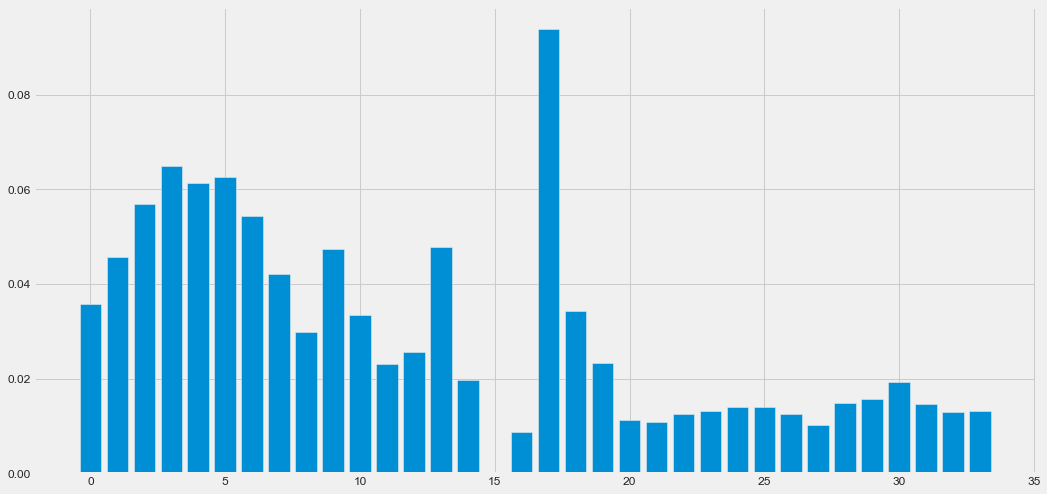

In [15]:
import matplotlib.pyplot as plt
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [17]:
list_feat_imp = []
for i in range(len(importance)):
    list_feat_imp.append([importance[i]])


[[0.03576996958557995],
 [0.04559857150941977],
 [0.05688318371959626],
 [0.0648591749864484],
 [0.061276165663118165],
 [0.06267725280021108],
 [0.05434791333848687],
 [0.04215840618517697],
 [0.029933789872439213],
 [0.04737955596409895],
 [0.03341554746984178],
 [0.023175450094977006],
 [0.02561330093277688],
 [0.04786594929564295],
 [0.019638341876492788],
 [5.554526244598017e-05],
 [0.0087330978671139],
 [0.09386119347820075],
 [0.03418751010147808],
 [0.02320693758863687],
 [0.011328978610665086],
 [0.01087980103371829],
 [0.012539113179701205],
 [0.013236996768846512],
 [0.014095494980692779],
 [0.01393825101138861],
 [0.012485623391745903],
 [0.010220359599770645],
 [0.014868740626038223],
 [0.01571803504476294],
 [0.01934080015207114],
 [0.014637265208407283],
 [0.012900797020088863],
 [0.013172885779920027]]

In [22]:
df_feature_imp = pd.DataFrame(columns = data_test[predictor].columns.tolist(), index=['0'])
df_feature_imp

,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,FP_9,FP_10,...,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,score_11,score_12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
for i in range(df_feature_imp.shape[1]):
    df_feature_imp[df_feature_imp.columns[i]] = importance[i]
    
df_feature_imp

,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,FP_9,FP_10,...,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,score_11,score_12
0,0.03577,0.045599,0.056883,0.064859,0.061276,0.062677,0.054348,0.042158,0.029934,0.04738,...,0.014095,0.013938,0.012486,0.01022,0.014869,0.015718,0.019341,0.014637,0.012901,0.013173


In [24]:
df_transposed = df_feature_imp.T
df_transposed = df_transposed.sort_values('0')

<AxesSubplot:title={'center':'Feature Importance Model RandomForest'}>

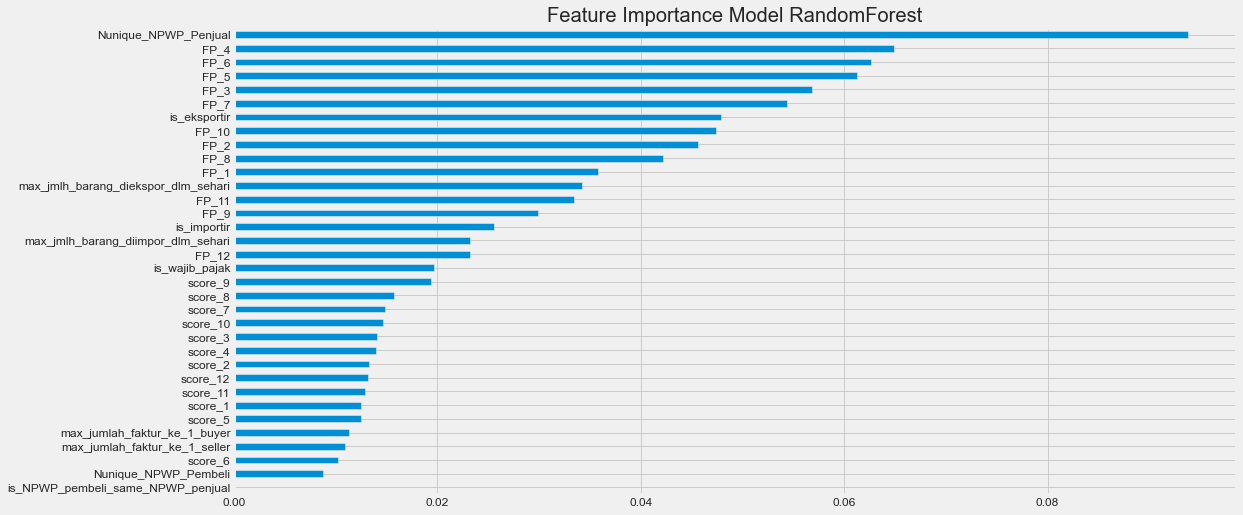

In [25]:
df_transposed.plot(kind='barh',title='Feature Importance Model RandomForest', legend=False)

## Shap Value secara umum

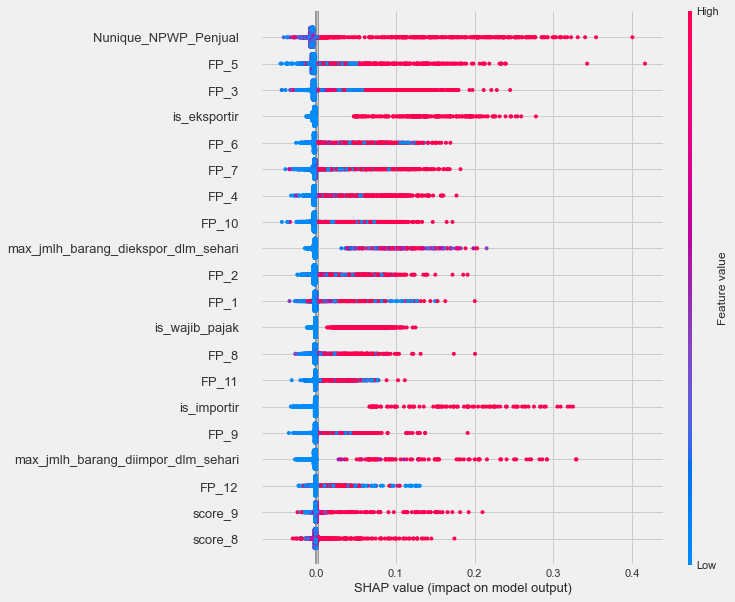

In [26]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_test[predictor])
shap.summary_plot(shap_values[1], data_test[predictor])


## Shap value per data point 

### Label 0 (Normal behaviour)

In [24]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(model)

In [26]:
data_test.loc[[101]]

,Unnamed: 0,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,score_6,score_7,score_8,score_9,score_10,score_11,score_12,scores,anomaly,y_pred
101,101,869238407958555,-2.106585e+11,-2.715018e+11,-3.474996e+11,-3.993085e+11,-2.640580e+11,-5.359407e+11,-4.679561e+11,-3.999786e+11,...,0.83624,0.612939,0.910976,0.682957,0.585032,0.6307,0.819837,0.016132,0,0


In [27]:
# Calculate Shap values
choosen_instance = data_test[predictor].loc[[101]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [113]:
data_test.loc[[590]]

,Unnamed: 0,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,score_6,score_7,score_8,score_9,score_10,score_11,score_12,scores,anomaly,y_pred
590,590,563165387196555,-116461010.1,-91086457.4,-62502031.9,-85222708.8,-77811551.9,-86512996.4,4.790897e+10,-54190706.3,...,0.389563,0.393835,0.333348,0.357804,0.385488,0.39558,0.432409,0.066944,0,0


In [126]:
# Calculate Shap values
choosen_instance = data_test[predictor].loc[[509]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [116]:
data_test.loc[[1290]]

,Unnamed: 0,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,score_6,score_7,score_8,score_9,score_10,score_11,score_12,scores,anomaly,y_pred
1290,1290,568856915906555,466809.6,0.0,-68295813.7,-909123192.4,1676037.5,0.0,-4.373266e+08,-387007283.4,...,0.0,0.500203,0.544827,0.0,0.437516,0.2,0.459298,0.047264,0,0


In [127]:
# Calculate Shap values
choosen_instance = data_test[predictor].loc[[1290]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

### Label 1 (Anomaly Behaviour)

In [28]:
data_test.loc[[1000]]

,Unnamed: 0,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,score_6,score_7,score_8,score_9,score_10,score_11,score_12,scores,anomaly,y_pred
1000,1000,570663612088555,2.380720e+13,1.604615e+13,2.546825e+13,1.492705e+13,2.024099e+13,1.637045e+13,8.400116e+12,1.277680e+13,...,0.430713,0.358605,0.309712,0.29761,0.333117,0.291018,0.330316,-0.249642,1,1


In [29]:
# Calculate Shap values
choosen_instance = data_test[predictor].loc[[1000]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [122]:
data_test.loc[[1]]

,Unnamed: 0,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,score_6,score_7,score_8,score_9,score_10,score_11,score_12,scores,anomaly,y_pred
1,1,560540673980555,1.921724e+12,6.836181e+11,3.637846e+12,1.861282e+11,9.103713e+11,2.880675e+12,1.614540e+12,1.087428e+12,...,0.488183,0.497002,0.502556,0.517378,0.494605,0.481987,0.505271,-0.150084,1,1


In [128]:
# Calculate Shap values
choosen_instance = data_test[predictor].loc[[1]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [125]:
data_test.loc[[3014]]

,Unnamed: 0,NPWP,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,score_6,score_7,score_8,score_9,score_10,score_11,score_12,scores,anomaly,y_pred
3014,3014,561961249061555,1.285567e+10,8.014432e+10,1.158338e+09,7.642841e+09,1.699654e+08,2.214745e+08,2.774864e+08,1.588156e+10,...,0.337457,0.410557,0.39834,0.315198,0.367352,0.420358,0.311865,-0.036249,1,1


In [129]:
# Calculate Shap values
choosen_instance = data_test[predictor].loc[[3014]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)